 mylist =  [1, 3, 6, 10] 
a = (x**2 for x in mylist)
print(next(a), next(a)) 

In [3]:
import os  # for input-Output operations

In [55]:
import numpy as np  # for all numerical operations

In [56]:
import pandas as pd   # for dataFrame operations

In [57]:

from fancyimpute import KNN  # for all KNN family operations

In [58]:
from scipy.stats import chi2_contingency  # for chi-sqr test and comtingency table

In [59]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt   # for Box plot


In [61]:
from random import randrange , uniform 

In [62]:
from sklearn import tree  #for Decision Tree

In [63]:
from sklearn.metrics import accuracy_score    #for Accurancy and FNR statistical operations

In [64]:
from ggplot import *

In [65]:
#os.chdir('C:\\Users\\patil\\Downloads\\DS_works\\DataSets')

In [66]:
os.chdir('C:\\Users\\patil\\Downloads\\Advance Analytics')

In [67]:
os.getcwd()

'C:\\Users\\patil\\Downloads\\Advance Analytics'

In [68]:
marketing_train = pd.read_csv("marketing_train.csv")

In [69]:
marketing_train.shape

(7414, 22)

In [70]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [71]:
#Exploratory Data Analysis (Converting data into proper shape i.e. Numeric into numeric dtype and caractor into factor dtype)
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

In [72]:
marketing_train.shape


(7414, 22)

In [73]:
missing_val = pd.DataFrame(marketing_train.isnull().sum())

In [74]:
missing_val

,0
custAge,1804
profession,0
marital,0
schooling,2155
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,711


In [75]:

missing_val = missing_val.reset_index()

In [76]:
missing_val

,index,0
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [77]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})


In [78]:
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

In [79]:
missing_val

,Variables,Missing_percentage
0,custAge,24.332344
1,profession,0.000000
2,marital,0.000000
3,schooling,29.066631
4,default,0.000000
5,housing,0.000000
6,loan,0.000000
7,contact,0.000000
8,month,0.000000
9,day_of_week,9.589965


In [80]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False)


In [81]:
missing_val

,Variables,Missing_percentage
3,schooling,29.066631
0,custAge,24.332344
9,day_of_week,9.589965
12,previous,0.000000
20,pastEmail,0.000000
19,pmonths,0.000000
18,nr.employed,0.000000
17,euribor3m,0.000000
16,cons.conf.idx,0.000000
15,cons.price.idx,0.000000


In [82]:
#reset_index
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [83]:
missing_val

,Variables,Missing_percentage
0,schooling,29.066631
1,custAge,24.332344
2,day_of_week,9.589965
3,pdays,0.000000
4,marital,0.000000
5,default,0.000000
6,housing,0.000000
7,loan,0.000000
8,contact,0.000000
9,month,0.000000


In [84]:
#Save the Work Done back into the HDD
#missing_val.to_csv("Missing_perc2.csv",index=False)

In [85]:
marketing_train['custAge'].loc[70]

29.0

In [86]:
#replacing that locations value (29.0) with NA
marketing_train['custAge'].loc[70]=np.nan

C:\Users\patil\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
marketing_train['custAge'].loc[70]

nan

In [88]:
#fill that nan with mean
marketing_train['custAge']=marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

In [89]:

marketing_train['custAge'].loc[70]

40.011766803351755

In [90]:
#fill that nan with median
marketing_train['custAge']=marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [91]:
#check median answer
marketing_train['custAge'].loc[70]

40.011766803351755

In [92]:
#reset the value for KNN imputation
#replacing that locations value (29.0) with NA
#marketing_train['custAge'].loc[70]=np.nan

In [93]:
marketing_train['custAge'].loc[70]

40.011766803351755

In [94]:
#KNN imputation
#Assigning levels to the categories

lis=[]
for i in range(0,marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes=='object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i]=marketing_train.iloc[:,i].cat.codes
        marketing_train.iloc[:,i]=marketing_train.iloc[:,i].astype('object')
        lis.append(marketing_train.columns[i])

In [95]:
lis = []
for i in range (0, marketing_train.shape[1]):
        #print(i)
        if(marketing_train.iloc[:,i].dtype=='object'):
            marketing_train.iloc[:,i]=pd.Categorical(marketing_train.iloc[:,i])
            marketing_train.iloc[:,i]=marketing_train.iloc[:,i].cat.codes
            marketing_train.iloc[:,i]=marketing_train.iloc[:,i].astype('object')
            
            lis.append(marketing_train.iloc[i])
            

In [96]:
print(marketing_train.iloc[[i]])

    custAge profession marital schooling default housing loan contact month  \
21     32.0          0       1         0       0       0    0       0     2   

   day_of_week  ...  previous  poutcome  emp.var.rate cons.price.idx  \
21           3  ...         1         2          -1.8         92.893   

    cons.conf.idx  euribor3m  nr.employed  pmonths  pastEmail  responded  
21          -46.2      1.327       5099.1      0.2          1          1  

[1 rows x 22 columns]


In [97]:
#apply knn imputation algorithm to all variables
#marketing_train=pd.DataFrame(KNN(k=3).fit_transform(marketing_train),columns=marketing_train.columns)

In [98]:
#now check our imputation
marketing_train['custAge'].loc[70]

40.011766803351755

In [99]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,2,1,0,0,0,2,2,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.011767,1,1,0,0,0,0,0,2,2,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,1,1,1,0,0,0,1,2,2,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,0,0,0,1,2,1,0,2,5,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.011767,0,0,2,0,2,0,0,2,4,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [100]:
#for i in range (0, marketing_train.shape[i]):
  #  marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1,np.nan)

In [101]:
#mtrain = pd.DataFrame(KNN(k = 3).columns = mtrain.columns)

In [102]:
df=marketing_train.copy()

In [103]:
df

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,2,1,0,0,0,2,2,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.011767,1,1,0,0,0,0,0,2,2,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,1,1,1,0,0,0,1,2,2,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,0,0,0,1,2,1,0,2,5,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.011767,0,0,2,0,2,0,0,2,4,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,1,2,1,0,0,0,1,2,5,...,0,1,1.1,93.994,-36.4,4.859,5191.0,999.0,0,0
7410,45.000000,1,1,1,1,0,0,1,2,4,...,0,1,1.4,93.918,-42.7,4.961,5228.1,999.0,0,0
7411,27.000000,1,2,0,0,0,0,0,2,1,...,1,0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,0
7412,51.000000,0,0,1,1,2,0,0,2,3,...,0,1,-0.1,93.200,-42.0,4.076,5195.8,999.0,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x24ca42d0ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x24ca42dcb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ca42d0608>],
 'medians': [<matplotlib.lines.Line2D at 0x24ca42dcd08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ca42e1dc8>],
 'means': []}

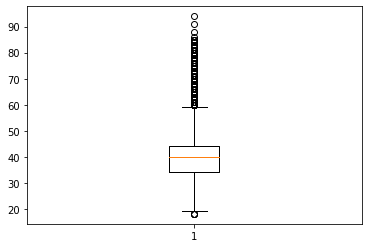

In [104]:
%matplotlib inline

plt.boxplot(marketing_train['custAge'])

In [105]:
#Since above Box_Plot is applied on categorcal variable.
#Now save numeric variables
cnames= ["campaign","custAge","pdays","previous","emp.var.rate","cons.conf.idx","euribor3m","nr.employed","pmonths","pastEmail"]



In [106]:
cnames

['campaign',
 'custAge',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [107]:
cn=['campaign',
 'custAge',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [108]:
cn

['campaign',
 'custAge',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [109]:
#Exp.1) Detect and delete outliers from data  Exp.2) Detect and replpace outliers with NA

In [110]:
df

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,2,1,0,0,0,2,2,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.011767,1,1,0,0,0,0,0,2,2,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,1,1,1,0,0,0,1,2,2,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,0,0,0,1,2,1,0,2,5,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.011767,0,0,2,0,2,0,0,2,4,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,1,2,1,0,0,0,1,2,5,...,0,1,1.1,93.994,-36.4,4.859,5191.0,999.0,0,0
7410,45.000000,1,1,1,1,0,0,1,2,4,...,0,1,1.4,93.918,-42.7,4.961,5228.1,999.0,0,0
7411,27.000000,1,2,0,0,0,0,0,2,1,...,1,0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,0
7412,51.000000,0,0,1,1,2,0,0,2,3,...,0,1,-0.1,93.200,-42.0,4.076,5195.8,999.0,0,0


In [111]:
#load Original Data into df
#marketing_train=df.copy()
#df.copy=marketing_train

In [112]:
marketing_train


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,2,1,0,0,0,2,2,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.011767,1,1,0,0,0,0,0,2,2,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,1,1,1,0,0,0,1,2,2,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,0,0,0,1,2,1,0,2,5,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.011767,0,0,2,0,2,0,0,2,4,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,1,2,1,0,0,0,1,2,5,...,0,1,1.1,93.994,-36.4,4.859,5191.0,999.0,0,0
7410,45.000000,1,1,1,1,0,0,1,2,4,...,0,1,1.4,93.918,-42.7,4.961,5228.1,999.0,0,0
7411,27.000000,1,2,0,0,0,0,0,2,1,...,1,0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,0
7412,51.000000,0,0,1,1,2,0,0,2,3,...,0,1,-0.1,93.200,-42.0,4.076,5195.8,999.0,0,0


In [113]:
#q75, q25 = np.percentile(df['custAge'], [75 ,25])
#Detect and replpace outliers with NA and extract the quartiles
q75,q25=np.percentile(marketing_train['custAge'], [75 ,25])

In [114]:
iqr = q75 - q25

In [115]:
q75

44.0

In [116]:
# #Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

In [117]:
minimum

19.0

In [118]:
maximum

59.0

In [119]:
#Nomalisation
#for i in cnames:
    #print(i)
    #marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

In [120]:
marketing_train.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,2,1,0,0,0,2,2,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.011767,1,1,0,0,0,0,0,2,2,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,1,1,1,0,0,0,1,2,2,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,0,0,0,1,2,1,0,2,5,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.011767,0,0,2,0,2,0,0,2,4,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
5,47.000000,1,1,1,0,2,0,1,2,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
6,35.000000,1,2,0,0,2,0,1,2,4,...,0,1,1.1,93.994,-36.4,4.856,5191.0,999.0,0,1
7,40.011767,1,1,1,0,2,0,1,2,5,...,0,1,1.1,93.994,-36.4,4.856,5191.0,999.0,0,0
8,28.000000,0,1,1,0,2,0,0,2,1,...,0,1,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,0
9,46.000000,1,1,1,0,2,0,0,2,2,...,1,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0


In [121]:
#marketing_train['custAge'].describe()

In [122]:
# #Replace with NA
#marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
#marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan


In [123]:
# #Calculate missing value
#missing_val = pd.DataFrame(marketing_train.isnull().sum())

In [124]:
#marketing_train.isnull().sum()

In [125]:
# #Impute with KNN
#marketing_train = pd.DataFrame(KNN(k = 3).Complete(marketing_train), columns = marketing_train.columns)

In [126]:
# #Impute with KNN
#marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

In [127]:
#marketing_train.head(100)

## Feature Selection

In [128]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

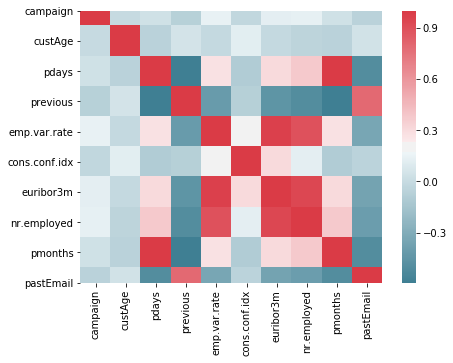

In [129]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize = (7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [130]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [131]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
8.197123528632523e-05
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
0.13826234929472533
poutcome
3.898575747043989e-181


In [132]:
marketing_train.shape

(7414, 22)

In [133]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

In [134]:
marketing_train

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,2,1,0,2,1,0,1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.011767,1,1,0,0,0,2,1,0,1,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,1,1,1,0,1,2,1,0,1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,0,0,0,1,0,2,2,0,1,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.011767,0,0,2,0,0,2,5,1,0,92.893,-46.2,1.291,5099.1,999.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,1,2,1,0,1,2,3,0,1,93.994,-36.4,4.859,5191.0,999.0,0,0
7410,45.000000,1,1,1,1,1,2,3,0,1,93.918,-42.7,4.961,5228.1,999.0,0,0
7411,27.000000,1,2,0,0,0,2,2,1,0,92.893,-46.2,1.250,5099.1,999.0,3,0
7412,51.000000,0,0,1,1,0,2,2,0,1,93.200,-42.0,4.076,5195.8,999.0,0,0


# Feature Scaling

In [135]:
#df = marketing_train.copy()
#marketing_train = df.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

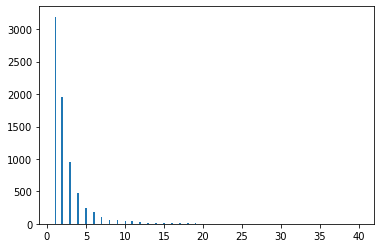

In [136]:
#check Normality  Before Normalization
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [137]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]

In [138]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [139]:
#Standarisation
#for i in cnames:
    #print(i)
    #marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

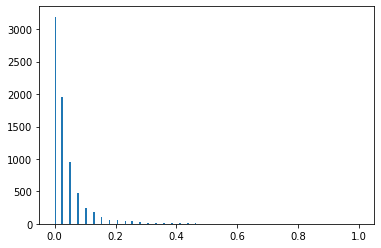

In [140]:
#check Normality After Normalization 
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [141]:
#chek data Normalized to (1 to 0)
marketing_train

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,2,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.289629,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,0,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.289629,0,0,2,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,0.197368,1,2,1,0,1,2,0.051282,0.000000,1,0.698753,0.602510,0.957833,0.859735,1.0,0.000000,0
7410,0.355263,1,1,1,1,1,2,0.051282,0.000000,1,0.669135,0.338912,0.980957,1.000000,1.0,0.000000,0
7411,0.118421,1,2,0,0,0,2,0.025641,0.166667,0,0.269680,0.192469,0.139651,0.512287,1.0,0.166667,0
7412,0.434211,0,0,1,1,0,2,0.025641,0.000000,1,0.389322,0.368201,0.780322,0.877883,1.0,0.000000,0


## Sampling Techniques

In [142]:
##Simple random sampling
Sim_Sampling = marketing_train.sample(4000)

In [143]:
Sim_Sampling

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
4405,0.289629,0,1,1,0,0,1,0.000000,0.166667,2,0.935308,0.054393,0.090229,0.000000,0.0001,0.277778,1
2256,0.236842,1,1,0,0,0,0,0.000000,0.166667,0,0.340608,0.154812,0.175924,0.512287,1.0000,0.111111,0
3462,0.289629,0,2,2,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0000,0.000000,0
3733,0.302632,1,1,1,1,1,2,0.051282,0.000000,1,0.882307,0.376569,0.982317,1.000000,1.0000,0.000000,0
3262,0.500000,1,1,1,1,1,2,0.000000,0.000000,1,0.882307,0.376569,0.980503,1.000000,1.0000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,0.328947,1,1,0,1,1,2,0.000000,0.000000,1,0.882307,0.376569,0.980957,1.000000,1.0000,0.000000,0
409,0.276316,1,1,1,0,0,1,0.025641,0.333333,0,0.935308,0.054393,0.076627,0.000000,1.0000,0.333333,0
2074,0.328947,0,0,1,0,1,2,0.025641,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0000,0.000000,0
1321,0.236842,1,1,1,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.981410,1.000000,1.0000,0.000000,0


In [144]:
#Save the Normalized WorkData back into the HDD
marketing_train.to_csv("marktrain_Normalized.csv",index=False)

In [145]:
#stratified_Sampling
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import train_test_split
#stratas=strata(marketing_train,c("profession"),size=c(100,199,10,5),method="srswor")

In [146]:
# #Select categorical variabl
#y = marketing_train['profession']


In [147]:
#select subset using stratified Sampling
#from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split


#Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

In [148]:
from sklearn.model_selection import train_test_split


In [149]:
Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

NameError: name 'y' is not defined

In [150]:
# ##Systematic Sampling
# #Calculate the K value
k = len(marketing_train)/3500

# # Generate a random number using simple random sampling
RandNum = randrange(0, 5)

# #select Kth observation starting from RandNum
#Sys_Sampling = marketing_train.iloc[RandNum::k, :]

In [151]:
Sys_Sampling = marketing_train.iloc[RandNum::k, :]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2.1182857142857143] of <class 'float'>

In [152]:
RandNum

0

In [153]:
k

2.1182857142857143

# Decision_Tree-Classification

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
import os

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
os.chdir('C:\\Users\\patil\\Downloads\\DS_works\\DataSets')

In [159]:
os.getcwd()

'C:\\Users\\patil\\Downloads\\DS_works\\DataSets'

In [160]:
marketing_train.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,2,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.289629,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,0,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.289629,0,0,2,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0


In [161]:
#convert Dep.Var output from 0 n 1 into Yes / No
marketing_train['responded']= marketing_train['responded'].replace(1,'Yes')

In [162]:
#CrossCheck
marketing_train['responded'].head(10)

0      0
1      0
2      0
3      0
4      0
5      0
6    Yes
7      0
8      0
9      0
Name: responded, dtype: object

In [163]:
#convert Dep.Var output from 0 n 1 into Yes / No
marketing_train['responded']= marketing_train['responded'].replace(0,'No')

In [164]:
marketing_train['responded'].head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6    Yes
7     No
8     No
9     No
Name: responded, dtype: object

In [165]:
#in python indexing starts from 0 , so 0:16 means total 17 var's and [,16] means 17th var.
marketing_train.values[0:3,16]

array(['No', 'No', 'No'], dtype=object)

In [166]:
#Now devide the data into train and test

X= marketing_train.values[:,0:16]     #saving all   var's in X
Y= marketing_train.values[:,16]        #saving 1 dep var in Y

In [167]:
#Now split the data into train and test
   #devided 80% and 20% of ALL var's data (17 var's) in X_train and into X_test Respectively
   #devided 80% and 20% of Dep.Var's data ( responded var's) into y_train and into y_test Respectively

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [168]:
type(X_train)

numpy.ndarray

In [169]:
X_train       #randomly  80% of All data  

array([[0.28962851057041783, 0, 1, ..., 0.8597353497164447, 1.0, 0.0],
       [0.2631578947368421, 1, 1, ..., 0.8778827977315683, 1.0, 0.0],
       [0.2236842105263158, 0, 1, ..., 1.0, 1.0, 0.0],
       ...,
       [0.4868421052631579, 0, 1, ..., 1.0, 1.0, 0.0],
       [0.18421052631578946, 0, 2, ..., 1.0, 1.0, 0.0],
       [0.13157894736842105, 1, 1, ..., 0.5122873345935728, 1.0, 0.0]],
      dtype=object)

In [170]:
#Now as data is devided , Build your DT_Model on train (X_train) data and after building test your model on test data (X_test axcluding dep var)
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)     #entropy for C5.0 and gini for CART statistical aproch

In [171]:
y_pred = clf.predict(X_test)

In [172]:
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [173]:
marketing_train

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,2,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,No
1,0.289629,1,1,0,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,No
2,0.315789,1,1,1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,No
3,0.486842,0,0,0,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,No
4,0.289629,0,0,2,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,0.197368,1,2,1,0,1,2,0.051282,0.000000,1,0.698753,0.602510,0.957833,0.859735,1.0,0.000000,No
7410,0.355263,1,1,1,1,1,2,0.051282,0.000000,1,0.669135,0.338912,0.980957,1.000000,1.0,0.000000,No
7411,0.118421,1,2,0,0,0,2,0.025641,0.166667,0,0.269680,0.192469,0.139651,0.512287,1.0,0.166667,No
7412,0.434211,0,0,1,1,0,2,0.025641,0.000000,1,0.389322,0.368201,0.780322,0.877883,1.0,0.000000,No


In [174]:
#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("pt.dot", 'w')
#df = tree.export_graphviz(clf, out_file=dotfile, feature_names = marketing_train.columns)
df = tree.export_graphviz(clf, out_file=dotfile, feature_names = marketing_train.columns)

ValueError: Length of feature_names, 17 does not match number of features, 16

## Error metrics - Classification type

In [175]:
#from sklearn.tree import DecisionTreeReressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import train_test_split

In [176]:
from sklearn.metrics import confusion_matrix

In [177]:
CM =  confusion_matrix(y_test, y_pred)

In [178]:
CM

array([[1195,  124],
       [ 118,   46]], dtype=int64)

In [179]:
# OR
CM = pd.crosstab(y_test,y_pred)

In [180]:
CM

col_0,No,Yes
row_0,,
No,1195,124
Yes,118,46


In [181]:
#Assign values to parameters

TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]


In [182]:
#CrossCheck
TN

1195

In [183]:
# Accuracy & FNR

accuracy_score (y_test,y_pred)

0.8368172623061362

In [184]:
# % Accuracy
accuracy_score (y_test,y_pred)*100

83.68172623061362

In [185]:
# OR

((TP+TN)*100 / (TP+TN+FP+FN)) 

83.68172623061362

In [186]:
# FNR
(FN*100) / (FN+TP)

71.95121951219512

In [187]:
# Reacall
(TP*100) / (FN+TP)

28.048780487804876

##   Errror metrics - Regression type

In [280]:

#As this is Classification data, for regression type error metrics , 

#see 'Box_Plot to till DT clasification by Python Finally ;-).ipnyb' file



# Random Forest - Classification

In [284]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier


In [283]:
# from 
CM = pd.crosstab(y_test,y_pred)

# DT Accuracy =  83.81
# DT FNR = 69.64

In [282]:
CM

col_0,No,Yes
row_0,,
No,1192,123
Yes,117,51


In [298]:
RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [299]:
X_train

array([[0.28962851057041783, 1, 0, ..., 0.5122873345935728, 1.0, 0.0],
       [0.47368421052631576, 0, 1, ..., 0.20378071833648256, 1.0, 0.0],
       [0.28962851057041783, 1, 1, ..., 0.8778827977315683, 1.0, 0.0],
       ...,
       [0.23684210526315788, 1, 1, ..., 1.0, 1.0, 0.0],
       [0.5263157894736842, 0, 1, ..., 0.0, 1.0, 0.0],
       [0.3684210526315789, 1, 1, ..., 1.0, 1.0, 0.0]], dtype=object)

In [300]:
RF_model 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [301]:
# Now lets apply this Model on Test data
RF_predictions = RF_model.predict(X_test) 

In [302]:
RF_predictions    # Predicted Dep Var

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [303]:
# build Con. Matrix for predicted models evaluation
CM = pd.crosstab(y_test, RF_predictions )       # compairing both dep var  (original + predicted) then Map conf. Matrix

In [304]:
CM

col_0,No,Yes
row_0,,
No,1265,50
Yes,119,49


In [305]:
#Assign values to parameters

TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]


In [306]:
# % Accuracy
# or     ((TP+TN)*100 / (TP+TN+FP+FN)) 

accuracy_score (y_test, RF_predictions)*100          # DT accuracy_score was = 83.81

88.60418071476737

In [308]:
# FNR      from 69.64
(FN*100) / (FN+TP)       

70.83333333333333

 TRY  ONCE BY INCREASING  NO OF TREES

In [309]:
RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)

In [310]:
RF_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [311]:
RF_predictions

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [312]:
CM = pd.crosstab(y_test, RF_predictions )

In [313]:
accuracy_score (y_test, RF_predictions)*100 

88.60418071476737

In [315]:
# FNR      from 69.64
(FN*100) / (FN+TP)  

70.83333333333333

In [1]:
marketing_train

NameError: name 'marketing_train' is not defined

In [318]:
os.getcwd()

'C:\\Users\\patil\\Downloads\\DS_works\\DataSets'

# Linear Regression

In [316]:
#As this is Classification data, for regression type error metrics , see ''Decision Tree Regression.ipnyb' file


# Logistic Regression

In [11]:
#As this is Classification data, for regression type error metrics , see ''Decision Tree Regression.ipnyb' file


array([[0.28962851057041783, 0, 1, ..., 0.8597353497164447, 1.0, 0.0],
       [0.2631578947368421, 1, 1, ..., 0.8778827977315683, 1.0, 0.0],
       [0.2236842105263158, 0, 1, ..., 1.0, 1.0, 0.0],
       ...,
       [0.4868421052631579, 0, 1, ..., 1.0, 1.0, 0.0],
       [0.18421052631578946, 0, 2, ..., 1.0, 1.0, 0.0],
       [0.13157894736842105, 1, 1, ..., 0.5122873345935728, 1.0, 0.0]],
      dtype=object)

## KNN Classification

In [188]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace('No', 0)
marketing_train['responded'] = marketing_train['responded'].replace('Yes', 1)

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:

# At first,   K= 1

KNN_model = KNeighborsClassifier (n_neighbors=1).fit(X_train, y_train)

In [192]:
# now Predict test case/TV
KNN_predictions = KNN_model.predict(X_test)

In [202]:
ConfMatrix = pd.crosstab(y_test, KNN_predictions)


  #Assign values to parameters

TN= ConfMatrix.iloc[0,0]
FN= ConfMatrix.iloc[1,0]
TP= ConfMatrix.iloc[1,1]
FP= ConfMatrix.iloc[0,1]


In [203]:
ConfMatrix

col_0,No,Yes
row_0,,
No,1264,55
Yes,127,37


In [206]:
# Accuracy = 86 %
((TP+TN)*100/(TP+TN+FP+FN))

87.72757923128793

In [207]:
# FNR
(FN*100)/(TP+FN)

77.4390243902439

In [199]:
# Now,  select ,   K= 3 

KNN_model = KNeighborsClassifier (n_neighbors=3).fit(X_train, y_train)

In [200]:
# now Predict test case/TV
KNN_predictions = KNN_model.predict(X_test)

In [201]:
ConfMatrix = pd.crosstab(y_test, KNN_predictions)

In [205]:
# Accuracy = 87.72
((TP+TN)*100/(TP+TN+FP+FN))

87.72757923128793

In [208]:
# Simmillarly At K=5 ,
# Accuracy =89 %
# K=9 , Accuracy = 89% 

# Conclusion = Here LOgistic Rregression Performing better than KNN Classification

## Naive Bayes - Python

In [210]:
# Only used for Classification problem. Worth proven for Text Mining & but can be used for Data Mining as well, 

from sklearn.naive_bayes import GaussianNB


In [211]:
NB_Model = GaussianNB().fit(X_train, y_train)     # build model on ind var & dep var of train data


In [212]:
NB_Predictions = NB_Model.predict(X_test)      # test model on ind var.s of test data and predict new dep var on test dataTthen comapre new with actual dep var of test data


In [213]:
NB_Predictions

array(['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype='<U3')

In [217]:
# build Con. Matrix on new_predicted_dep_var (of test data) Vs  Actual dep_var (of test data)
CM = pd.crosstab(y_test, NB_Predictions )       # compairing both dep var  (original + predicted) then Map conf. Matrix


#Assign values to parameters

TN= CM.iloc[0,0]
FN= CM.iloc[1,0]
TP= CM.iloc[1,1]
FP= CM.iloc[0,1]


In [216]:
CM

col_0,No,Yes
row_0,,
No,1128,191
Yes,75,89


In [220]:
# Accuracy = 82 %

((TP+TN)*100/(TP+TN+FP+FN))

82.0633850303439

In [221]:
# FNR = 45%      better than all models
(FN*100)/(TP+FN)

45.73170731707317